In [1]:
import pandas as pd
import numpy as np
import ast
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_path = "ia_A/ia_A.csv"
tsv_path = "IA reports/ia_A.tsv"

In [3]:
df_clean = pd.read_csv(csv_path)
df_raw = pd.read_table(tsv_path, encoding="utf-16")

In [4]:
df_raw['subject_id'] = df_raw['DATA_FILE'].str.replace('.edf', '', regex=False)

In [5]:
df_adding_columns = df_clean.copy()

df_adding_columns['IA_ID'] = df_adding_columns['IA_ID'] + 1
df_adding_columns[['batch', 'article_id', 'level', 'paragraph_id']] = df_adding_columns['unique_paragraph_id'].str.split('_', expand=True)

df_adding_columns['batch'] = df_adding_columns['batch'].astype(int)
df_adding_columns['article_id'] = df_adding_columns['article_id'].astype(int)
df_adding_columns['paragraph_id'] = df_adding_columns['paragraph_id'].astype(int)

df_merged = df_adding_columns.merge(
    df_raw,
    on=['batch', 'article_id', 'paragraph_id', 'level', 'subject_id', 'IA_ID', 'TRIAL_INDEX'],
    how='left',
    suffixes=('', '_raw')
)
df_merged

,Unnamed: 0,TRIAL_INDEX,IA_AVERAGE_FIX_PUPIL_SIZE,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_VISITED_IA_COUNT,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_RUN_FIXATION_%,...,has_preview_raw,level_ind,list_raw,paragraph,practice_raw,principle_list,q_ind_raw,question_raw,reread_raw,trial
0,0,1,NaN,0,0.0000,0,0,0,0,NaN,...,1.0,0.0,42.0,Leading water scientists have issued one of th...,1.0,6.0,0.0,"According to Malik Falkenmark's report, what w...",0.0,1.0
1,1,1,NaN,0,0.0000,0,0,0,0,NaN,...,1.0,0.0,42.0,Leading water scientists have issued one of th...,1.0,6.0,0.0,"According to Malik Falkenmark's report, what w...",0.0,1.0
2,2,1,NaN,0,0.0000,0,0,0,0,NaN,...,1.0,0.0,42.0,Leading water scientists have issued one of th...,1.0,6.0,0.0,"According to Malik Falkenmark's report, what w...",0.0,1.0
3,3,1,NaN,0,0.0000,0,0,0,0,NaN,...,1.0,0.0,42.0,Leading water scientists have issued one of th...,1.0,6.0,0.0,"According to Malik Falkenmark's report, what w...",0.0,1.0
4,4,1,NaN,0,0.0000,0,0,0,0,NaN,...,1.0,0.0,42.0,Leading water scientists have issued one of th...,1.0,6.0,0.0,"According to Malik Falkenmark's report, what w...",0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948429,948429,76,913.00,381,0.1138,132,5,1,132,0.0526,...,0.0,2.0,2.0,Currie's Larry Pizzi thinks that e-bikes will ...,0.0,2.0,1.0,What is true of the cargo bike?,1.0,67.0
948430,948430,76,NaN,0,0.0000,0,0,0,0,NaN,...,0.0,2.0,2.0,Currie's Larry Pizzi thinks that e-bikes will ...,0.0,2.0,1.0,What is true of the cargo bike?,1.0,67.0
948431,948431,76,883.33,261,0.0780,150,12,0,260,0.1053,...,0.0,2.0,2.0,Currie's Larry Pizzi thinks that e-bikes will ...,0.0,2.0,1.0,What is true of the cargo bike?,1.0,67.0
948432,948432,76,911.00,213,0.0636,213,6,1,213,0.0526,...,0.0,2.0,2.0,Currie's Larry Pizzi thinks that e-bikes will ...,0.0,2.0,1.0,What is true of the cargo bike?,1.0,67.0


In [6]:
df_merged[["TRIAL_INDEX", "IA_ID", "IA_LABEL", "question", "a", "b", "c", "d"]]

,TRIAL_INDEX,IA_ID,IA_LABEL,question,a,b,c,d
0,1,1,According,"According to Malik Falkenmark's report, what w...","By 2050, nine billion people will not have eno...",There will not be sufficient water to grow eno...,"By 2050, animal-based protein consumption will...",Obesity rates around the world will rise
1,1,2,to,"According to Malik Falkenmark's report, what w...","By 2050, nine billion people will not have eno...",There will not be sufficient water to grow eno...,"By 2050, animal-based protein consumption will...",Obesity rates around the world will rise
2,1,3,Malik,"According to Malik Falkenmark's report, what w...","By 2050, nine billion people will not have eno...",There will not be sufficient water to grow eno...,"By 2050, animal-based protein consumption will...",Obesity rates around the world will rise
3,1,4,Falkenmark's,"According to Malik Falkenmark's report, what w...","By 2050, nine billion people will not have eno...",There will not be sufficient water to grow eno...,"By 2050, animal-based protein consumption will...",Obesity rates around the world will rise
4,1,5,"report,","According to Malik Falkenmark's report, what w...","By 2050, nine billion people will not have eno...",There will not be sufficient water to grow eno...,"By 2050, animal-based protein consumption will...",Obesity rates around the world will rise
...,...,...,...,...,...,...,...,...
948429,76,27,e-bikes,What is true of the cargo bike?,It can be ridden by children,It is especially popular with baby boomers,It is more expensive than regular e-bikes,It can transport 45kg
948430,76,28,It,What is true of the cargo bike?,It can be ridden by children,It is especially popular with baby boomers,It is more expensive than regular e-bikes,It can transport 45kg
948431,76,29,can,What is true of the cargo bike?,It can be ridden by children,It is especially popular with baby boomers,It is more expensive than regular e-bikes,It can transport 45kg
948432,76,30,transport,What is true of the cargo bike?,It can be ridden by children,It is especially popular with baby boomers,It is more expensive than regular e-bikes,It can transport 45kg


In [7]:
df_merged['question'] = df_merged['question'].fillna('').astype(str)
df_merged['a'] = df_merged['a'].fillna('').astype(str)
df_merged['b'] = df_merged['b'].fillna('').astype(str)
df_merged['c'] = df_merged['c'].fillna('').astype(str)
df_merged['d'] = df_merged['d'].fillna('').astype(str)

In [8]:
df_merged['question_tokens'] = df_merged['question'].str.split()
df_merged['a_tokens'] = df_merged['a'].str.split()
df_merged['b_tokens'] = df_merged['b'].str.split()
df_merged['c_tokens'] = df_merged['c'].str.split()
df_merged['d_tokens'] = df_merged['d'].str.split()

df_merged['question_len'] = df_merged['question_tokens'].apply(len)
df_merged['a_len'] = df_merged['a_tokens'].apply(len)
df_merged['b_len'] = df_merged['b_tokens'].apply(len)
df_merged['c_len'] = df_merged['c_tokens'].apply(len)
df_merged['d_len'] = df_merged['d_tokens'].apply(len)

In [9]:
def assign_belongs_to(group):
    q_len = group['question_len'].iloc[0]
    a_len = group['a_len'].iloc[0]
    b_len = group['b_len'].iloc[0]
    c_len = group['c_len'].iloc[0]
    d_len = group['d_len'].iloc[0]

    q_end = q_len - 1
    a_end = q_len + a_len - 1
    b_end = q_len + a_len + b_len - 1
    c_end = q_len + a_len + b_len + c_len - 1

    index_id = group['IA_ID'] - 1

    conditions = [
        (index_id <= q_end),
        (index_id > q_end) & (index_id <= a_end),
        (index_id > a_end) & (index_id <= b_end),
        (index_id > b_end) & (index_id <= c_end),
        (index_id > c_end)
    ]

    choices = ['question', 'answer_a', 'answer_b', 'answer_c', 'answer_d']

    group['belongs_to'] = np.select(conditions, choices, default='unknown')

    return group
    #debug this!

In [10]:
df_area_split = df_merged.groupby('TRIAL_INDEX', group_keys=False).apply(assign_belongs_to)
df_area_split

C:\Users\deeth\AppData\Local\Temp\ipykernel_35412\2871275690.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_area_split = df_merged.groupby('TRIAL_INDEX', group_keys=False).apply(assign_belongs_to)


,Unnamed: 0,TRIAL_INDEX,IA_AVERAGE_FIX_PUPIL_SIZE,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_VISITED_IA_COUNT,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_RUN_FIXATION_%,...,a_tokens,b_tokens,c_tokens,d_tokens,question_len,a_len,b_len,c_len,d_len,belongs_to
0,0,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[By, 2050,, nine, billion, people, will, not, ...","[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question
1,1,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[By, 2050,, nine, billion, people, will, not, ...","[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question
2,2,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[By, 2050,, nine, billion, people, will, not, ...","[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question
3,3,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[By, 2050,, nine, billion, people, will, not, ...","[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question
4,4,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[By, 2050,, nine, billion, people, will, not, ...","[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948429,948429,76,913.00,381,0.1138,132,5,1,132,0.0526,...,"[It, can, be, ridden, by, children]","[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_c
948430,948430,76,NaN,0,0.0000,0,0,0,0,NaN,...,"[It, can, be, ridden, by, children]","[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_c
948431,948431,76,883.33,261,0.0780,150,12,0,260,0.1053,...,"[It, can, be, ridden, by, children]","[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_d
948432,948432,76,911.00,213,0.0636,213,6,1,213,0.0526,...,"[It, can, be, ridden, by, children]","[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_d


In [11]:
def find_correct_location(row):
    correct_answer = str(row['correct_answer'])
    return row['answers_order'].index(correct_answer)

df_area_split['answers_order'] = df_area_split['answers_order'].apply(ast.literal_eval)
df_area_split['location_of_correct'] = df_area_split.apply(find_correct_location, axis=1)
df_area_split

C:\Users\deeth\AppData\Local\Temp\ipykernel_35412\3312007842.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_area_split['location_of_correct'] = df_area_split.apply(find_correct_location, axis=1)


,Unnamed: 0,TRIAL_INDEX,IA_AVERAGE_FIX_PUPIL_SIZE,IA_DWELL_TIME,IA_DWELL_TIME_%,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_VISITED_IA_COUNT,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_DWELL_TIME,IA_FIRST_RUN_FIXATION_%,...,b_tokens,c_tokens,d_tokens,question_len,a_len,b_len,c_len,d_len,belongs_to,location_of_correct
0,0,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question,0
1,1,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question,0
2,2,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question,0
3,3,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question,0
4,4,1,NaN,0,0.0000,0,0,0,0,NaN,...,"[There, will, not, be, sufficient, water, to, ...","[By, 2050,, animal-based, protein, consumption...","[Obesity, rates, around, the, world, will, rise]",19,11,12,11,7,question,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948429,948429,76,913.00,381,0.1138,132,5,1,132,0.0526,...,"[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_c,2
948430,948430,76,NaN,0,0.0000,0,0,0,0,NaN,...,"[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_c,2
948431,948431,76,883.33,261,0.0780,150,12,0,260,0.1053,...,"[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_d,2
948432,948432,76,911.00,213,0.0636,213,6,1,213,0.0526,...,"[It, is, especially, popular, with, baby, boom...","[It, is, more, expensive, than, regular, e-bikes]","[It, can, transport, 45kg]",7,6,7,7,4,answer_d,2


In [12]:
df_relevant = df_area_split[(df_area_split['practice'] == 0)]
#remove rereads

df_relevant = df_relevant[
    ["TRIAL_INDEX", 'unique_paragraph_id', "subject_id",
     "IA_ID", "IA_LABEL", "belongs_to",
     "is_correct","FINAL_ANSWER", "correct_answer", "answers_order", "location_of_correct",
     "IA_DWELL_TIME","normalized_dwell_time", "IA_FIXATION_COUNT", "IA_SKIP",
     "INTEREST_AREA_FIXATION_SEQUENCE",
     'has_preview',
     'Length', 'Wordfreq_Frequency', 'subtlex_Frequency', 'gpt2_Surprisal',
     "POS", "TAG"
     ]
]
df_relevant

,TRIAL_INDEX,unique_paragraph_id,subject_id,IA_ID,IA_LABEL,belongs_to,is_correct,FINAL_ANSWER,correct_answer,answers_order,...,IA_FIXATION_COUNT,IA_SKIP,INTEREST_AREA_FIXATION_SEQUENCE,has_preview,Length,Wordfreq_Frequency,subtlex_Frequency,gpt2_Surprisal,POS,TAG
99,4,3_6_Ele_1,l42_2070,1,What,question,True,3,3,"[1, 2, 3, 0]",...,0,1,"[2, 5, 8, 9, 6, 20, 24, 23, 28, 27, 14, 13, 15...",Hunting,4,8.702750,6.630082,5.702752,PRON,WP
100,4,3_6_Ele_1,l42_2070,2,is,question,True,3,3,"[1, 2, 3, 0]",...,1,0,"[2, 5, 8, 9, 6, 20, 24, 23, 28, 27, 14, 13, 15...",Hunting,2,6.417348,6.757092,1.475214,AUX,VBZ
101,4,3_6_Ele_1,l42_2070,3,Currie,question,True,3,3,"[1, 2, 3, 0]",...,0,1,"[2, 5, 8, 9, 6, 20, 24, 23, 28, 27, 14, 13, 15...",Hunting,6,19.668534,23.982347,14.877785,PROPN,NNP
102,4,3_6_Ele_1,l42_2070,4,Technologies?,question,True,3,3,"[1, 2, 3, 0]",...,0,1,"[2, 5, 8, 9, 6, 20, 24, 23, 28, 27, 14, 13, 15...",Hunting,12,15.546138,19.417562,9.697602,PROPN,NNPS
103,4,3_6_Ele_1,l42_2070,5,A,answer_a,True,3,3,"[1, 2, 3, 0]",...,1,0,"[2, 5, 8, 9, 6, 20, 24, 23, 28, 27, 14, 13, 15...",Hunting,1,5.448509,5.577523,6.181300,DET,DT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948429,76,3_6_Ele_7,l2_324,27,e-bikes,answer_c,True,3,3,"[1, 2, 3, 0]",...,2,0,"[6, 10, 13, 22, 24, 27, 30, 31, 16, 20, 18, 23...",Gathering,8,11.726997,12.442865,4.161823,NOUN,NNS
948430,76,3_6_Ele_7,l2_324,28,It,answer_c,True,3,3,"[1, 2, 3, 0]",...,0,1,"[6, 10, 13, 22, 24, 27, 30, 31, 16, 20, 18, 23...",Gathering,2,6.810359,5.689067,3.574406,PRON,PRP
948431,76,3_6_Ele_7,l2_324,29,can,answer_d,True,3,3,"[1, 2, 3, 0]",...,3,1,"[6, 10, 13, 22, 24, 27, 30, 31, 16, 20, 18, 23...",Gathering,3,8.439715,7.537483,1.313513,AUX,MD
948432,76,3_6_Ele_7,l2_324,30,transport,answer_d,True,3,3,"[1, 2, 3, 0]",...,1,0,"[6, 10, 13, 22, 24, 27, 30, 31, 16, 20, 18, 23...",Gathering,9,14.349615,16.409962,5.713622,VERB,VB


"TRIAL_INDEX" - index of one paragraph reading \
"unique_paragraph_id" - exaclty which paragraph in the dataset of tests was read \
"subject_id" - id of a participant \
"IA_ID" - speciffic word being read \
"IA_LABEL" - string word being read \
"belongs_to" - weather this word is part of the question, answer_a, answer_b, answer_c or answer_d \
"is_correct" - weather the subject answered the question correctly \
"FINAL_ANSWER" - which answer was selected (by order they appeared on the screen) \
"correct_answer" - correct answer (by the order they appeared o the screen) \
"answers_order" - listing of 0 1 2 and 3 representing the order in which answer possibilities appeared on the screen \
"location_of_correct" - index of correct answer in "answers_order" list \
"IA_DWELL_TIME" - how long subject fixated on the word" \
"nowrmalized_dwell_time" - normalized DWELL_TIME \
"IA_FIXATION_COUNT" - how many times has the subject fixated on this word \
"IA_SKIP" - did the subject skip the word? \
"INTEREST_AREA_FIXATION_SEQUENCE" - list showing the order in which subject looked at words in the current trial  (by IA_ID's) \
"Length" - length of the word \
"Wordfreq_Frequence" - language frequency of the word estimation \
"subtlex_Frequency" - language frequency of the word estimation 2 \
"gpt2_Surprisal" - word surprisal calculated by gpt2 \
"POS" - part of speach \
"TAG" - eg: WP, VBZ, MD, RB, VB, NNP ect. \



In [14]:
df_gatherers = df_relevant[df_relevant['has_preview'] == 'Gathering']

Statistics

In [15]:
df_stats = df_gatherers.groupby(["TRIAL_INDEX", "subject_id", "belongs_to", "is_correct"], as_index=False).agg(
    mean_dwell_time=("IA_DWELL_TIME", "mean"),
    mean_fixation_count=("IA_FIXATION_COUNT", "mean")
)
df_stats

,TRIAL_INDEX,subject_id,belongs_to,is_correct,mean_dwell_time,mean_fixation_count
0,3,L41_408,answer_a,True,126.000000,0.888889
1,3,L41_408,answer_b,True,0.000000,0.000000
2,3,L41_408,answer_c,True,71.000000,0.666667
3,3,L41_408,answer_d,True,77.333333,0.666667
4,3,L41_408,question,True,52.846154,0.384615
...,...,...,...,...,...,...
53419,113,l6_83,answer_a,True,118.470588,0.823529
53420,113,l6_83,answer_b,True,125.400000,0.900000
53421,113,l6_83,answer_c,True,79.714286,0.571429
53422,113,l6_83,answer_d,True,96.600000,0.800000


C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9527.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for question_correct - mean_dwell_time: statistic=0.6626749502549143, p-value=4.63685152788739e-87


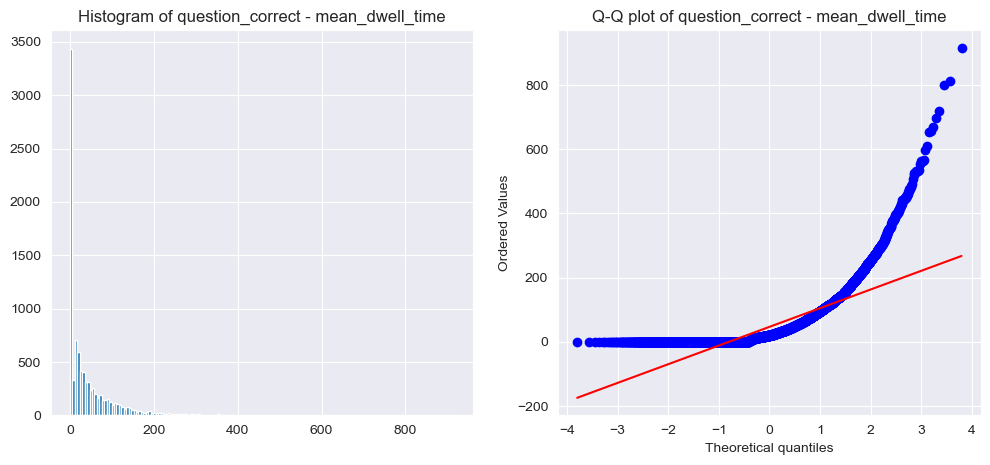

Shapiro-Wilk test for question_correct - mean_fixation_count: statistic=0.7220752953499651, p-value=1.1473102008797789e-82


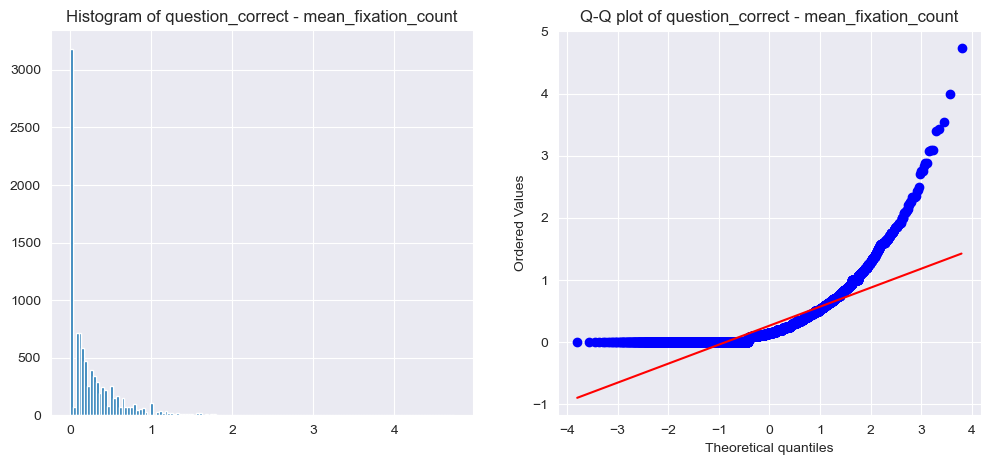

Shapiro-Wilk test for question_incorrect - mean_dwell_time: statistic=0.6515729993042779, p-value=1.4787364011338412e-54


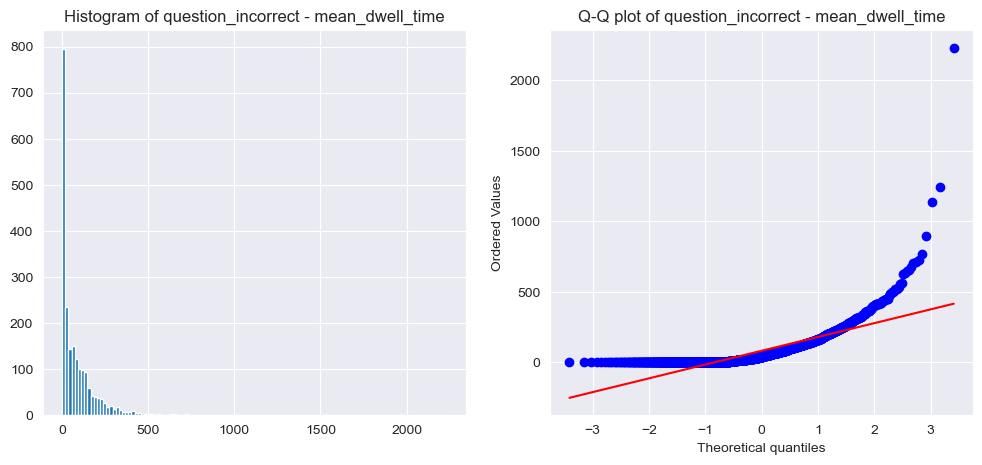

Shapiro-Wilk test for question_incorrect - mean_fixation_count: statistic=0.7207686203255275, p-value=8.300062086439981e-51


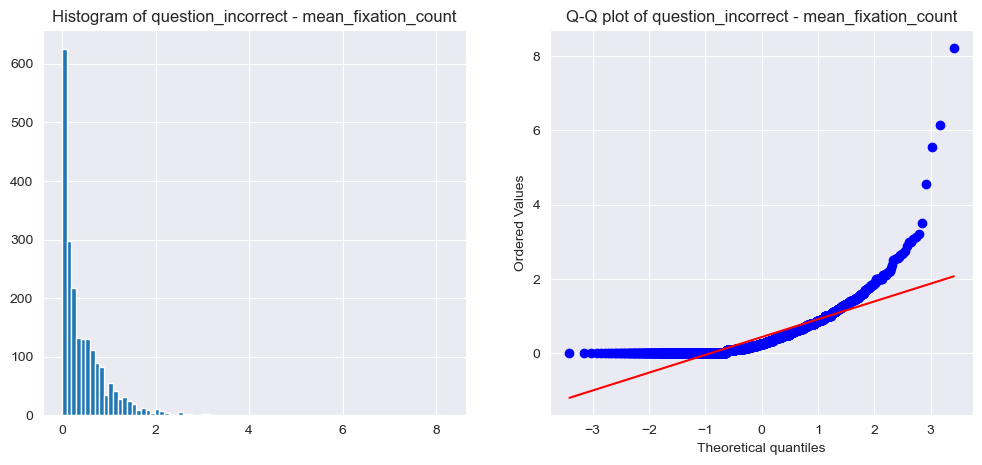

C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9503.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for answer_a_correct - mean_dwell_time: statistic=0.7839634482839948, p-value=4.539719168057474e-77


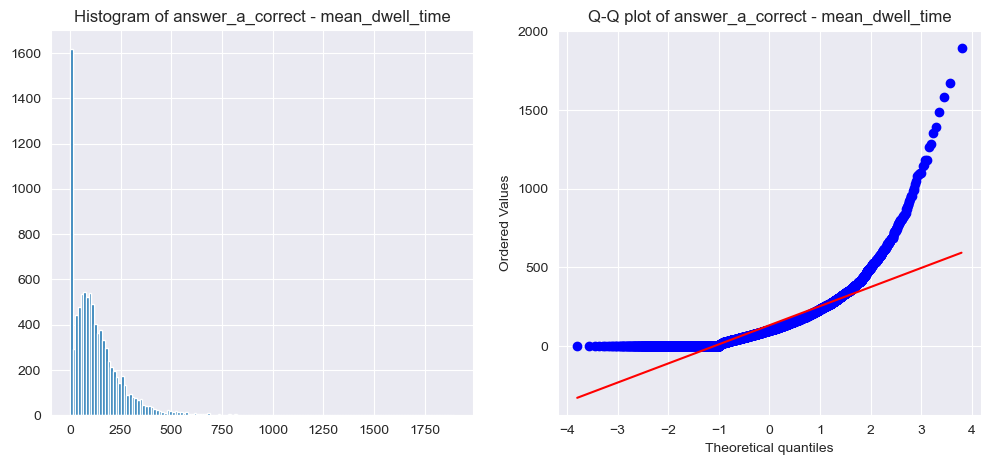

Shapiro-Wilk test for answer_a_correct - mean_fixation_count: statistic=0.8331428801754486, p-value=1.3533080102313706e-71


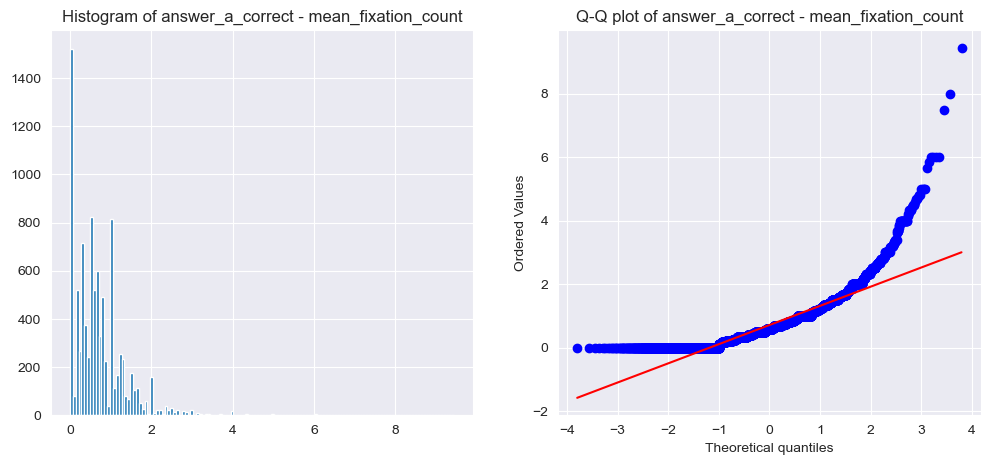

Shapiro-Wilk test for answer_a_incorrect - mean_dwell_time: statistic=0.68083420820259, p-value=5.542877772840574e-53


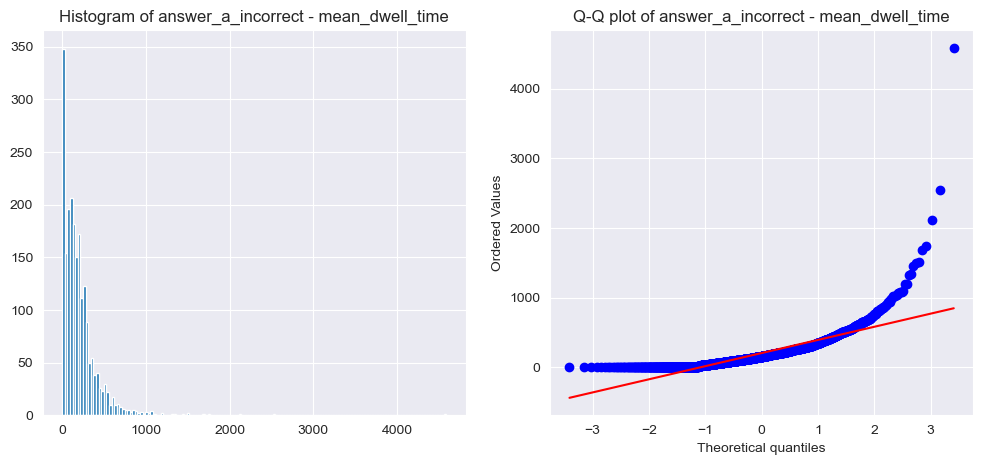

Shapiro-Wilk test for answer_a_incorrect - mean_fixation_count: statistic=0.8019042806404371, p-value=3.352754484004229e-45


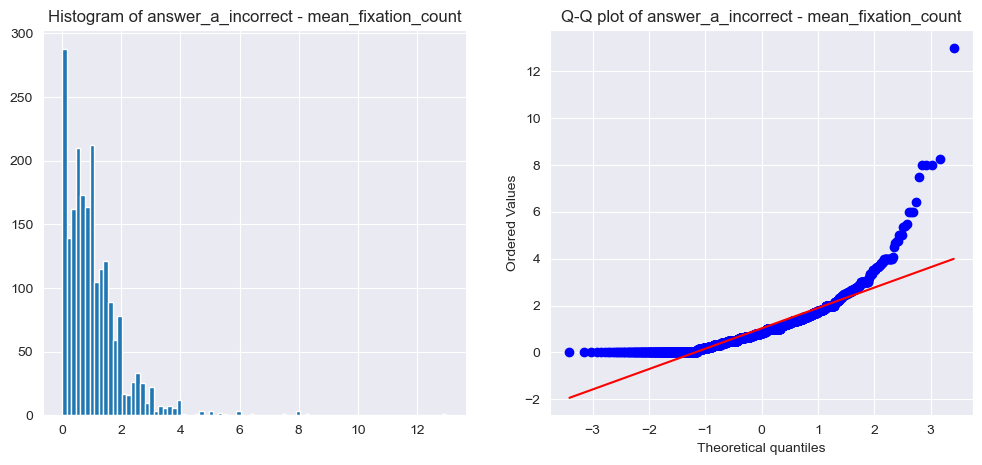

C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9186.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for answer_b_correct - mean_dwell_time: statistic=0.7615941967493195, p-value=1.9864653297765e-78


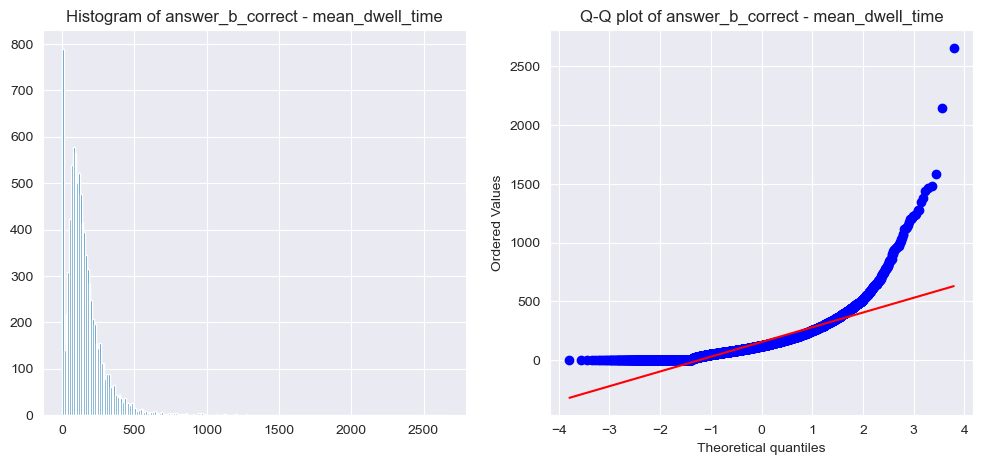

Shapiro-Wilk test for answer_b_correct - mean_fixation_count: statistic=0.8390504546114916, p-value=4.0866666500240384e-70


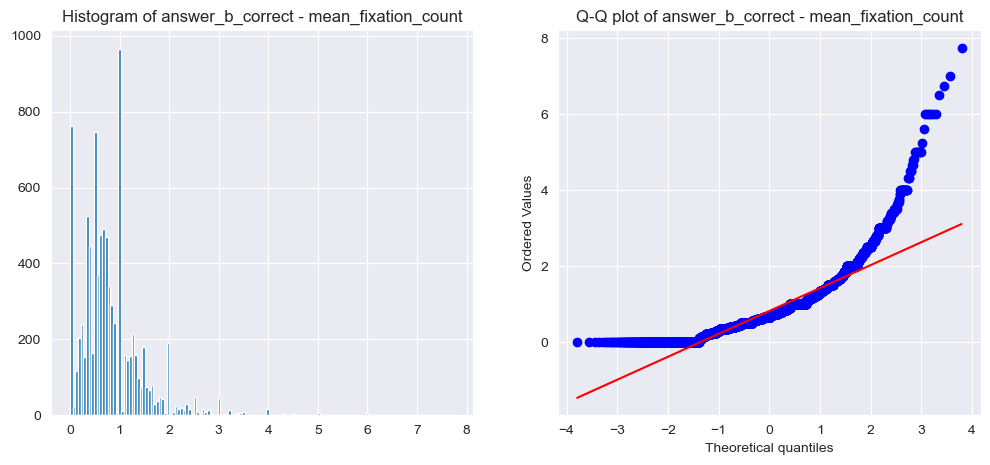

Shapiro-Wilk test for answer_b_incorrect - mean_dwell_time: statistic=0.8230014059457663, p-value=1.349959935777305e-42


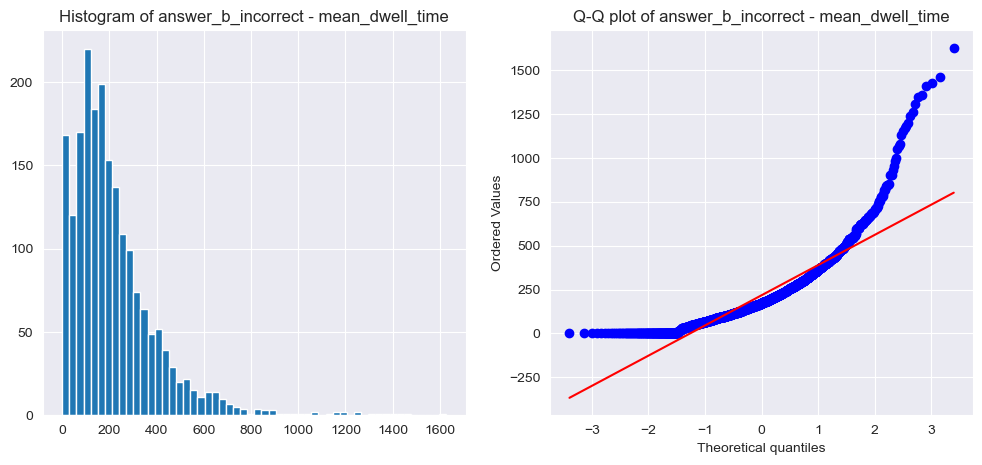

Shapiro-Wilk test for answer_b_incorrect - mean_fixation_count: statistic=0.8690087978767889, p-value=3.643669398296138e-38


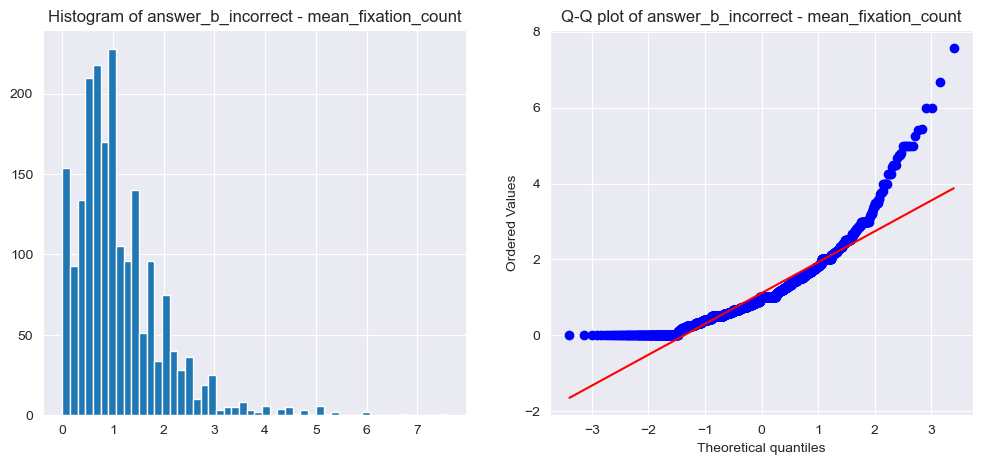

C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8420.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for answer_c_correct - mean_dwell_time: statistic=0.7735463895328321, p-value=2.4705285267711195e-75


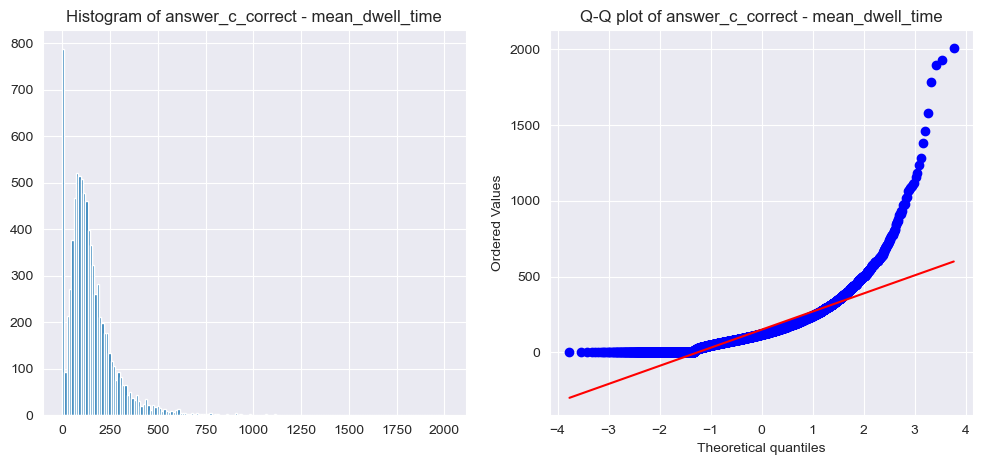

Shapiro-Wilk test for answer_c_correct - mean_fixation_count: statistic=0.8387840237867612, p-value=2.77517208424816e-68


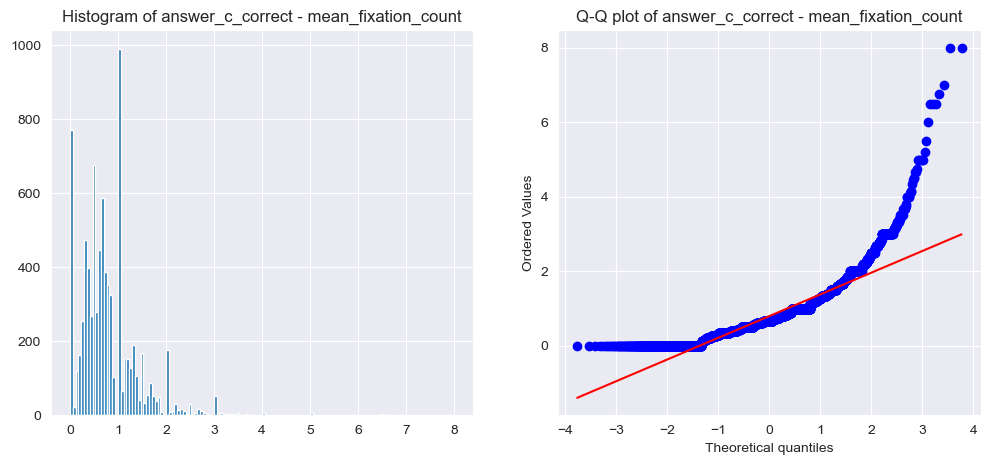

Shapiro-Wilk test for answer_c_incorrect - mean_dwell_time: statistic=0.7927239657961466, p-value=3.651147563173771e-43


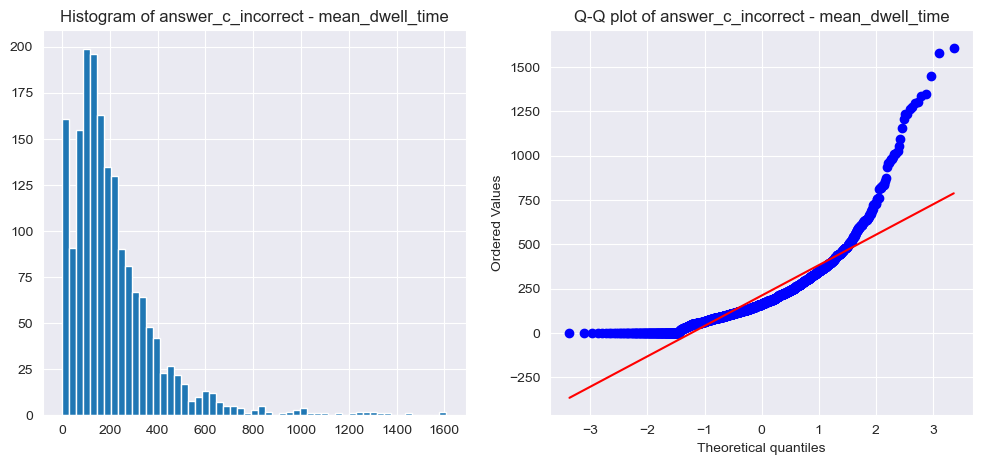

Shapiro-Wilk test for answer_c_incorrect - mean_fixation_count: statistic=0.8589744381093474, p-value=1.6025541990340553e-37


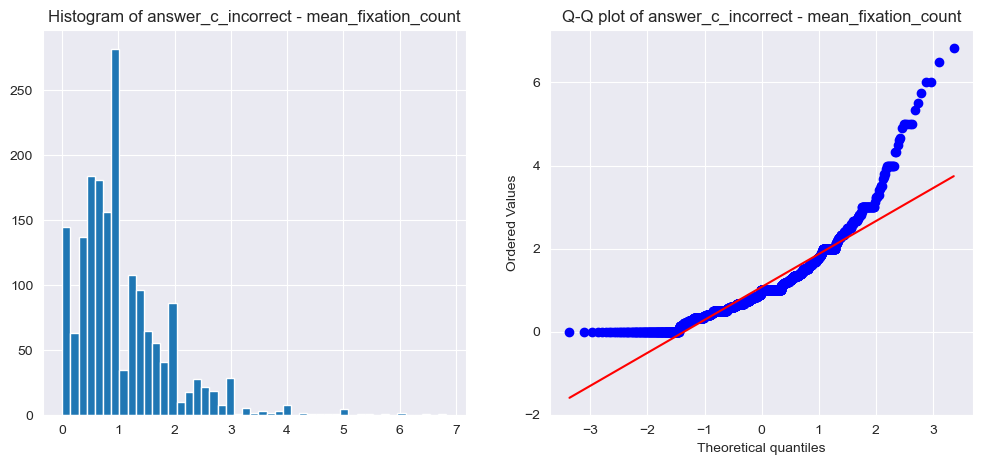

C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7186.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for answer_d_correct - mean_dwell_time: statistic=0.7973472120983339, p-value=1.6418787474889948e-69


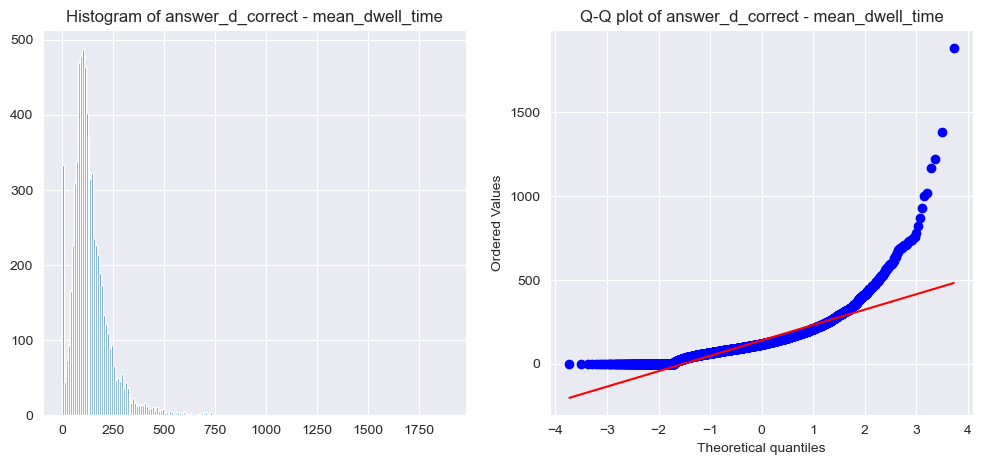

Shapiro-Wilk test for answer_d_correct - mean_fixation_count: statistic=0.8516538131404281, p-value=2.5483362273995196e-63


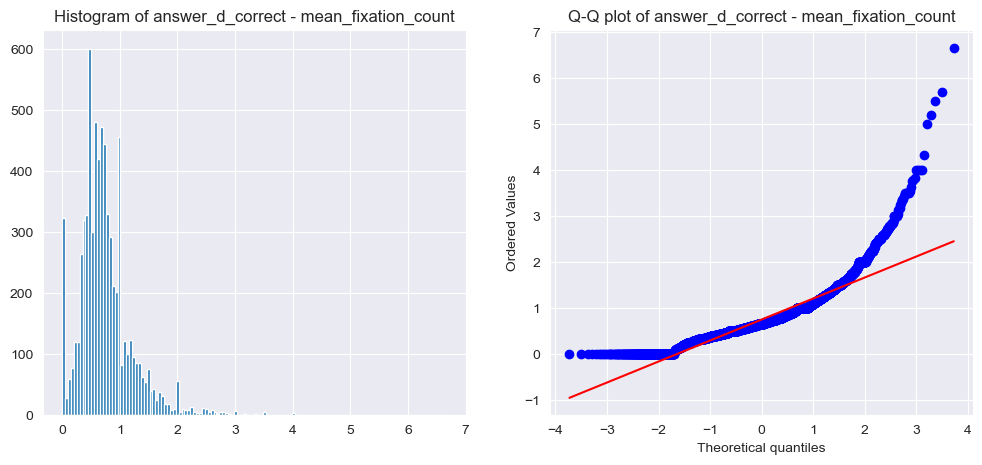

Shapiro-Wilk test for answer_d_incorrect - mean_dwell_time: statistic=0.8653440350163346, p-value=3.846807502317027e-34


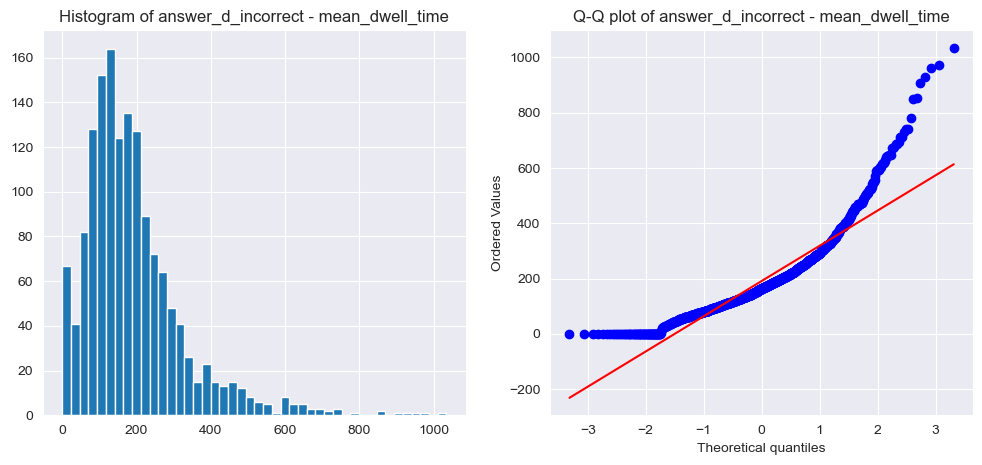

Shapiro-Wilk test for answer_d_incorrect - mean_fixation_count: statistic=0.9024947923189852, p-value=5.6315247346811674e-30


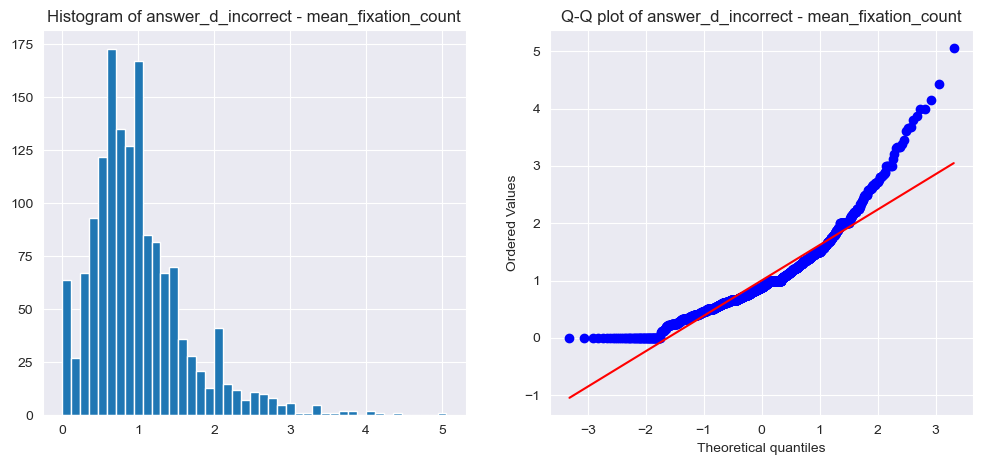

In [16]:
belongs_to_categories = ['question', 'answer_a', 'answer_b', 'answer_c', 'answer_d']
subsets = {}
for category in belongs_to_categories:
    subsets[f'{category}_correct'] = df_stats[(df_stats['belongs_to'] == category) & (df_stats['is_correct'] == True)]
    subsets[f'{category}_incorrect'] = df_stats[(df_stats['belongs_to'] == category) & (df_stats['is_correct'] == False)]

def check_normality(data, variable_name, subset_name):
    statistic, p_value = stats.shapiro(data[variable_name])
    print(f"Shapiro-Wilk test for {subset_name} - {variable_name}: statistic={statistic}, p-value={p_value}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(data[variable_name], bins='auto')
    plt.title(f"Histogram of {subset_name} - {variable_name}")

    plt.subplot(1, 2, 2)
    stats.probplot(data[variable_name], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {subset_name} - {variable_name}")
    plt.show()

for name, subset in subsets.items():
    check_normality(subset, "mean_dwell_time", name)
    check_normality(subset, "mean_fixation_count", name)

In [17]:
correct_group = df_stats[df_stats['is_correct'] == True]
incorrect_group = df_stats[df_stats['is_correct'] == False]

In [18]:
mannwhitney_dwell = stats.mannwhitneyu(
    correct_group['mean_dwell_time'],
    incorrect_group['mean_dwell_time'],
    alternative='two-sided'
)

mannwhitney_fix = stats.mannwhitneyu(
    correct_group['mean_fixation_count'],
    incorrect_group['mean_fixation_count'],
    alternative='two-sided'
)
print("Mann-Whitney U Test Results:")
print(f"Mean Dwell Time: U = {mannwhitney_dwell.statistic:.3f}, p = {mannwhitney_dwell.pvalue:.3e}")
print(f"Mean Fixation Count: U = {mannwhitney_fix.statistic:.3f}, p = {mannwhitney_fix.pvalue:.3e}")

#signifficant difference

Mann-Whitney U Test Results:
Mean Dwell Time: U = 168485615.000, p = 1.829e-206
Mean Fixation Count: U = 170249468.500, p = 8.660e-190


In [19]:
avg_metrics_by_category = df_stats.groupby(["belongs_to", "is_correct"], as_index=False).agg(
    mean_cat_dwell_time=("mean_dwell_time", "mean"),
    mean_cat_fixation_count=("mean_fixation_count", "mean")
)

avg_metrics_by_category

,belongs_to,is_correct,mean_cat_dwell_time,mean_cat_fixation_count
0,answer_a,False,202.067535,1.030368
1,answer_a,True,131.343965,0.710712
2,answer_b,False,217.997890,1.117348
3,answer_b,True,154.532625,0.820500
4,answer_c,False,211.803463,1.075970
5,answer_c,True,149.119787,0.797268
6,answer_d,False,191.085725,1.001643
7,answer_d,True,139.107970,0.758108
8,question,False,82.879182,0.437022
9,question,True,46.457848,0.263968


In [20]:
categories = df_stats['belongs_to'].unique()
results_dwell = []

for category in categories:
    category_data = df_stats[df_stats['belongs_to'] == category]

    correct_data = category_data[category_data['is_correct'] == True]
    incorrect_data = category_data[category_data['is_correct'] == False]

    if len(correct_data) == 0 or len(incorrect_data) == 0:
        continue

    correct_dwell = correct_data['mean_dwell_time']
    incorrect_dwell = incorrect_data['mean_dwell_time']

    mannwhitney_result = stats.mannwhitneyu(correct_dwell, incorrect_dwell, alternative='two-sided')

    results_dwell.append({
        'belongs_to': category,
        'U_statistic': mannwhitney_result.statistic,
        'p_value': mannwhitney_result.pvalue,
        'median_correct': correct_dwell.median(),
        'median_incorrect': incorrect_dwell.median(),
        'mean_correct': correct_dwell.mean(),
        'mean_incorrect': incorrect_dwell.mean()
    })

results_df_dwell = pd.DataFrame(results_dwell)
print(results_df_dwell.sort_values('p_value'))


  belongs_to  U_statistic       p_value  median_correct  median_incorrect  \
1   answer_b    7142687.5  3.421358e-59      122.171429        173.366667   
3   answer_d    3990258.0  6.502541e-59      117.307765        164.059343   
0   answer_a    7903573.5  8.390074e-56      101.000000        151.541667   
2   answer_c    5930822.5  3.888381e-50      119.828571        163.477778   
4   question    8228082.0  1.251176e-44       20.000000         40.685714   

   mean_correct  mean_incorrect  
1    154.532625      217.997890  
3    139.107970      191.085725  
0    131.343965      202.067535  
2    149.119787      211.803463  
4     46.457848       82.879182  


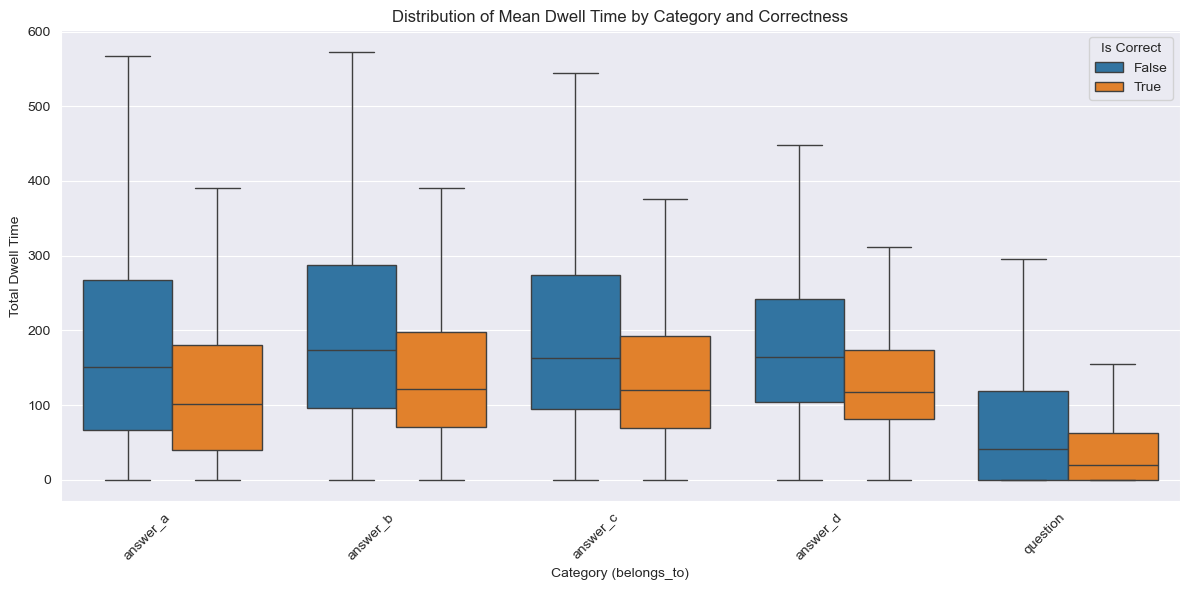

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_stats,
    x='belongs_to',
    y='mean_dwell_time',
    hue='is_correct',
    showfliers=False
)
plt.title("Distribution of Mean Dwell Time by Category and Correctness")
plt.xlabel("Category (belongs_to)")
plt.ylabel("Total Dwell Time")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Is Correct")
plt.show()


C:\Users\deeth\AppData\Local\Temp\ipykernel_35412\1230654519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


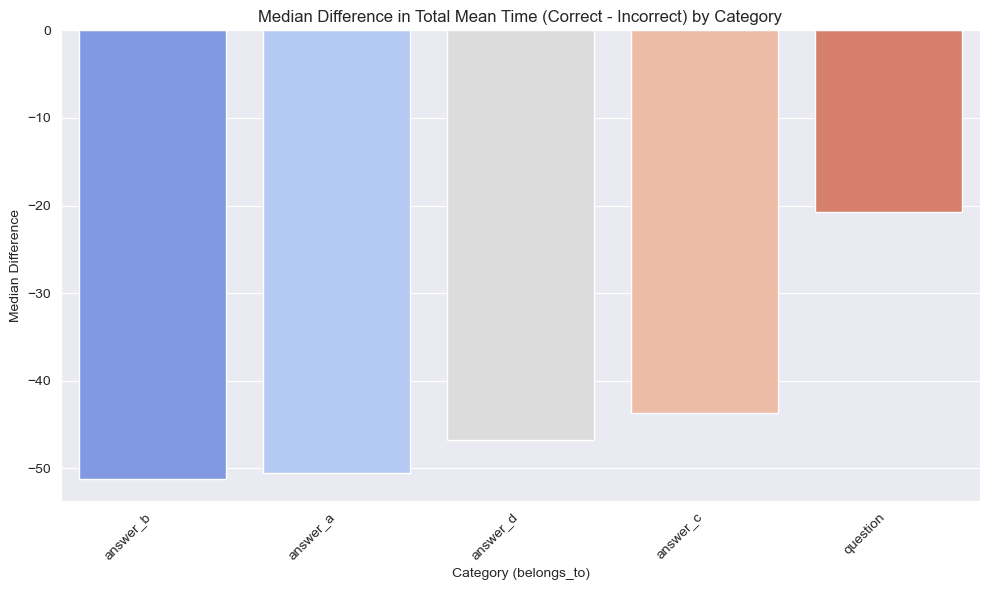

In [22]:
results_df_dwell['median_diff'] = results_df_dwell['median_correct'] - results_df_dwell['median_incorrect']

plt.figure(figsize=(10,6))
sns.barplot(
    x='belongs_to',
    y='median_diff',
    data=results_df_dwell.sort_values('median_diff'),
    palette='coolwarm'
)
plt.title("Median Difference in Total Mean Time (Correct - Incorrect) by Category")
plt.xlabel("Category (belongs_to)")
plt.ylabel("Median Difference")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [23]:
categories = df_stats['belongs_to'].unique()
results_fix = []

for category in categories:
    category_data = df_stats[df_stats['belongs_to'] == category]

    correct_data = category_data[category_data['is_correct'] == True]
    incorrect_data = category_data[category_data['is_correct'] == False]

    if len(correct_data) == 0 or len(incorrect_data) == 0:
        continue

    correct_fix = correct_data['mean_fixation_count']
    incorrect_fix = incorrect_data['mean_fixation_count']

    mannwhitney_result = stats.mannwhitneyu(correct_fix, incorrect_fix, alternative='two-sided')

    results_fix.append({
        'belongs_to': category,
        'U_statistic': mannwhitney_result.statistic,
        'p_value': mannwhitney_result.pvalue,
        'median_correct': correct_fix.median(),
        'median_incorrect': incorrect_fix.median(),
        'mean_correct': correct_fix.mean(),
        'mean_incorrect': incorrect_fix.mean()
    })

results_df_fix = pd.DataFrame(results_fix)
print(results_df_fix.sort_values('p_value'))

  belongs_to  U_statistic       p_value  median_correct  median_incorrect  \
1   answer_b    7209102.0  8.758811e-56        0.666667          1.000000   
0   answer_a    7945192.0  7.454073e-54        0.600000          0.833333   
3   answer_d    4058995.5  1.344976e-53        0.666667          0.883484   
2   answer_c    6042121.5  4.024787e-44        0.666667          1.000000   
4   question    8270868.0  9.056923e-43        0.142857          0.250000   

   mean_correct  mean_incorrect  
1      0.820500        1.117348  
0      0.710712        1.030368  
3      0.758108        1.001643  
2      0.797268        1.075970  
4      0.263968        0.437022  


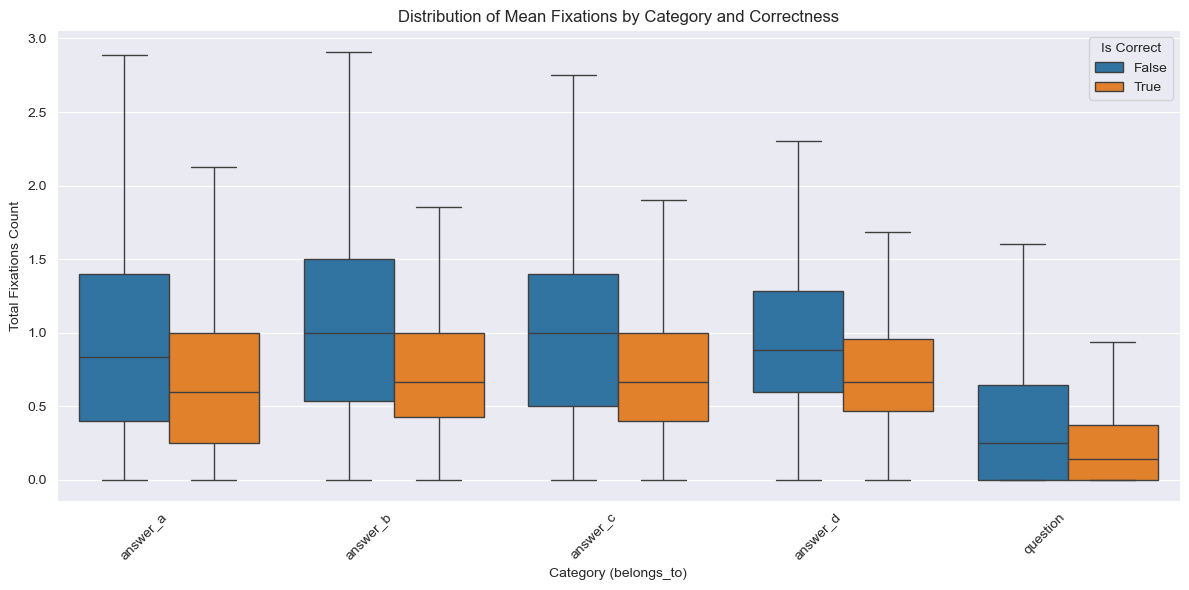

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df_stats,
    x='belongs_to',
    y='mean_fixation_count',
    hue='is_correct',
    showfliers=False
)
plt.title("Distribution of Mean Fixations by Category and Correctness")
plt.xlabel("Category (belongs_to)")
plt.ylabel("Total Fixations Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.legend(title="Is Correct")
plt.show()

#linear mixed effect models - correlation within the same subject.

C:\Users\deeth\AppData\Local\Temp\ipykernel_35412\1427174397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


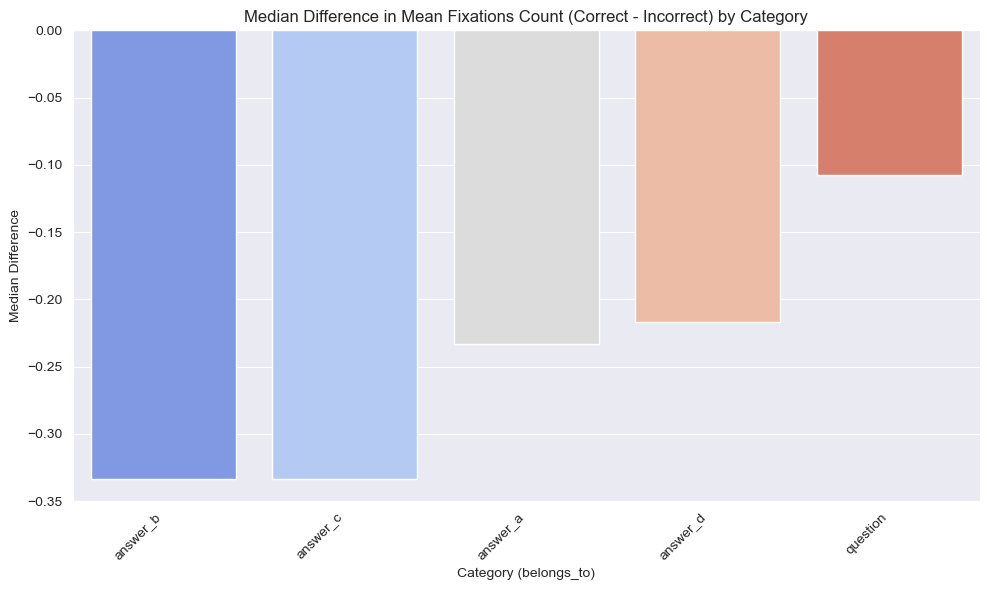

In [25]:
results_df_fix['median_diff'] = results_df_fix['median_correct'] - results_df_fix['median_incorrect']

plt.figure(figsize=(10,6))
sns.barplot(
    x='belongs_to',
    y='median_diff',
    data=results_df_fix.sort_values('median_diff'),
    palette='coolwarm'
)
plt.title("Median Difference in Mean Fixations Count (Correct - Incorrect) by Category")
plt.xlabel("Category (belongs_to)")
plt.ylabel("Median Difference")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Predict

In [26]:
list_of_feature_dicts = []

for (trial_idx, subject), group in df_gatherers.groupby(["TRIAL_INDEX", "subject_id"]):

    dwell_question = group.loc[group["belongs_to"] == "question", "IA_DWELL_TIME"].sum()
    dwell_answer_a = group.loc[group["belongs_to"] == "answer_a", "IA_DWELL_TIME"].sum()
    dwell_answer_b = group.loc[group["belongs_to"] == "answer_b", "IA_DWELL_TIME"].sum()
    dwell_answer_c = group.loc[group["belongs_to"] == "answer_c", "IA_DWELL_TIME"].sum()
    dwell_answer_d = group.loc[group["belongs_to"] == "answer_d", "IA_DWELL_TIME"].sum()

    fix_question = group.loc[group["belongs_to"] == "question", "IA_FIXATION_COUNT"].sum()
    fix_answer_a = group.loc[group["belongs_to"] == "answer_a", "IA_FIXATION_COUNT"].sum()
    fix_answer_b = group.loc[group["belongs_to"] == "answer_b", "IA_FIXATION_COUNT"].sum()
    fix_answer_c = group.loc[group["belongs_to"] == "answer_c", "IA_FIXATION_COUNT"].sum()
    fix_answer_d = group.loc[group["belongs_to"] == "answer_d", "IA_FIXATION_COUNT"].sum()

    n_question_words = (group["belongs_to"] == "question").sum()
    skip_question = group.loc[group["belongs_to"] == "question", "IA_SKIP"].sum() / (n_question_words + 1e-9)

    n_answer_a_words = (group["belongs_to"] == "answer_a").sum()
    skip_answer_a = group.loc[group["belongs_to"] == "answer_a", "IA_SKIP"].sum() / (n_answer_a_words + 1e-9)

    n_answer_b_words = (group["belongs_to"] == "answer_b").sum()
    skip_answer_b = group.loc[group["belongs_to"] == "answer_b", "IA_SKIP"].sum() / (n_answer_b_words + 1e-9)

    n_answer_c_words = (group["belongs_to"] == "answer_c").sum()
    skip_answer_c = group.loc[group["belongs_to"] == "answer_c", "IA_SKIP"].sum() / (n_answer_c_words + 1e-9)

    n_answer_d_words = (group["belongs_to"] == "answer_d").sum()
    skip_answer_d = group.loc[group["belongs_to"] == "answer_d", "IA_SKIP"].sum() / (n_answer_d_words + 1e-9)

    is_correct = group["is_correct"].iloc[0]

    feature_dict = {
        "TRIAL_INDEX": trial_idx,
        "subject_id": subject,
        "dwell_question": dwell_question,
        "dwell_answer_a": dwell_answer_a,
        "dwell_answer_b": dwell_answer_b,
        "dwell_answer_c": dwell_answer_c,
        "dwell_answer_d": dwell_answer_d,
        "fix_question": fix_question,
        "fix_answer_a": fix_answer_a,
        "fix_answer_b": fix_answer_b,
        "fix_answer_c": fix_answer_c,
        "fix_answer_d": fix_answer_d,
        "skip_question": skip_question,
        "skip_answer_a": skip_answer_a,
        "skip_answer_b": skip_answer_b,
        "skip_answer_c": skip_answer_c,
        "skip_answer_d": skip_answer_d,
        "is_correct": is_correct
    }

    list_of_feature_dicts.append(feature_dict)

df_features = pd.DataFrame(list_of_feature_dicts)

Logistic Regression Balanced Accuracy: 0.5172626468315024
Logistic Regression F1 Score: 0.8952017187873



C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


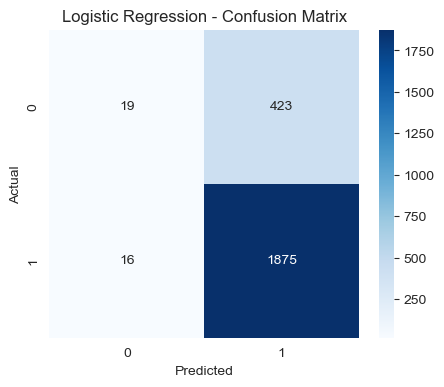

Random Forest Balanced Accuracy: 0.8075439348478354
Random Forest F1 Score: 0.8927120669056153



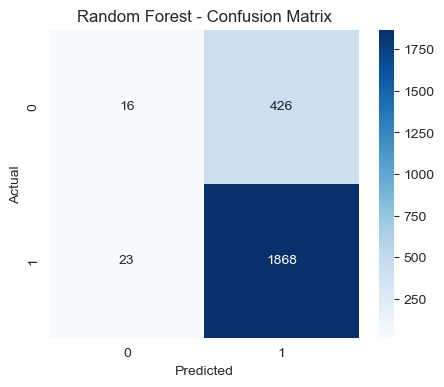

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, balanced_accuracy_score

#TODO - regression rates, dwell sums?, all the fixations_A data
#       time proportions in areas, reading order features
#       # regressions to the area
#       last area looked at
#       button press data?
#       first fix durr, ect.
#       features in order on screen and not just abcd would be better

#       A   B   C   D       - q locations heatmap (do we care about screen location)
#  1
#  2
#  3
#  4

#       was the correct answer already read / was the selected answer already read
#       Do both H/G - separately

feature_cols = [
    "dwell_question", "dwell_answer_a", "dwell_answer_b",
    "dwell_answer_c", "dwell_answer_d",
    "fix_question", "fix_answer_a", "fix_answer_b",
    "fix_answer_c", "fix_answer_d",
    "skip_question", "skip_answer_a", "skip_answer_b",
    "skip_answer_c", "skip_answer_d"
]

X = df_features[feature_cols]
y = df_features["is_correct"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

y_pred_lr = lr_clf.predict(X_test)

print("Logistic Regression Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Balanced Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Logistic Regression Accuracy: 0.5948323925429099
Logistic Regression F1 Score: 0.7904734902183158



C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


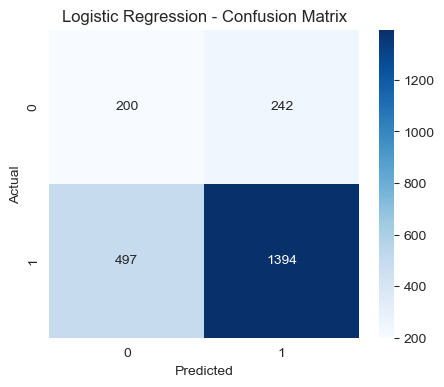

Random Forest Accuracy: 0.5562739434951461
Random Forest F1 Score: 0.8575083141468406



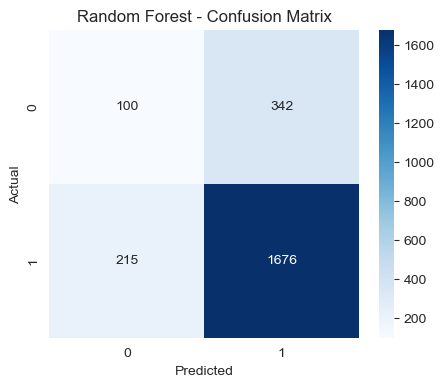

In [36]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

lr_clf = LogisticRegression(class_weight='balanced')
lr_clf.fit(X_resampled, y_resampled)

y_pred_lr = lr_clf.predict(X_test)

print("Logistic Regression Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Logistic Regression Accuracy: 0.5241235574081563
Logistic Regression F1 Score: 0.8956438487314504



C:\Users\deeth\miniconda3\envs\default_env\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


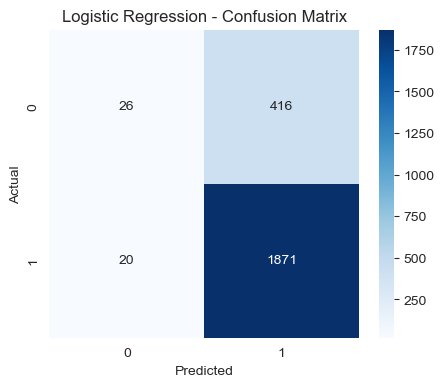

Random Forest Accuracy: 0.8054007715387913
Random Forest F1 Score: 0.8906024096385542



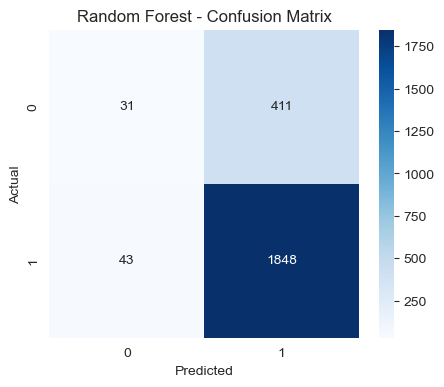

In [35]:
sample_size = int(0.4 * len(X_train))
indices = np.random.choice(len(X_train), size=sample_size, replace=False)

X_train_downsampled = X_train.iloc[indices]
y_train_downsampled = y_train.iloc[indices]


lr_clf = LogisticRegression()
lr_clf.fit(X_train_downsampled, y_train_downsampled)

y_pred_lr = lr_clf.predict(X_test)

print("Logistic Regression Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
print()

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_downsampled, y_train_downsampled)

y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Balanced Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
print()

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()